# Project 2 by Laila, Vivian, Willy

In [3]:
# This code does not just install the package in the notebook, but the container.
# NB that the container is not the image, so if you close the container and then 
# create a new container, you would have to reinstall this pkg
# if you want it in the new container.
library(mlbench)

In [4]:
wholesale_data = read.csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv', header = TRUE)

### 1. The size of the dataset both in terms of rows and columns, but also in memory.

In [15]:
#dim stands for dimensions
dim(wholesale_data)
head(wholesale_data)
#memory footprint
object.size(wholesale_data)

[1] 440   8

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


### 2. the types of the data
From the output of str(wholesale_data), we see that all the data is of type integer which matches the UCI repository's description of the dataset.

In the dataset, the regions are called region 1, 2, and 3. Region 1 is Lisbon, region 2 is Oporto, and region 3 is "Other Region". We deduced this because the repository told us the frequency of each region and from that, we were able to determine what region 1, 2, and 3 were. 

We used the same method to determine what channels 1 and 2 were. 
Channel 1 is Horeca (which stands for hotel/restaurant/cafe), channel 2 is retail. 

REGION	Frequency
Lisbon	77; 
Oporto	47 ;
Other Region	316; 
Total	440 

CHANNEL	Frequency 
Horeca	298 ;
Retail	142 ;
Total	440 

In [28]:
# This will give me the frequency of 1, 2, and 3 in Region column
table(wholesale_data$Region)


  1   2   3 
 77  47 316 

In [26]:
# This will give me the frequency of 1 and 2 in Channel column
table(wholesale_data$Channel)


  1   2 
298 142 

In [16]:
#str stands for structure
str(wholesale_data)

'data.frame':	440 obs. of  8 variables:
 $ Channel         : int  2 2 2 1 2 2 2 2 1 2 ...
 $ Region          : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicassen      : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


### 3. identify the features and the target (if applicable)
Unsupervised models, which include clustering models, do not have a target class because there is no output variable. 

In [9]:
colnames(wholesale_data)

[1] "Channel"          "Region"           "Fresh"            "Milk"            
[5] "Grocery"          "Frozen"           "Detergents_Paper" "Delicassen"

### 4. summary statistics of the data

In [17]:
summary(wholesale_data)

    Channel          Region          Fresh             Milk      
 Min.   :1.000   Min.   :1.000   Min.   :     3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128   1st Qu.: 1533  
 Median :1.000   Median :3.000   Median :  8504   Median : 3627  
 Mean   :1.323   Mean   :2.543   Mean   : 12000   Mean   : 5796  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934   3rd Qu.: 7190  
 Max.   :2.000   Max.   :3.000   Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper    Delicassen     
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

### 5. distribution of the target class
Unsupervised models, which include clustering models, do not have a target class because there is no output variable.   

## data exploration

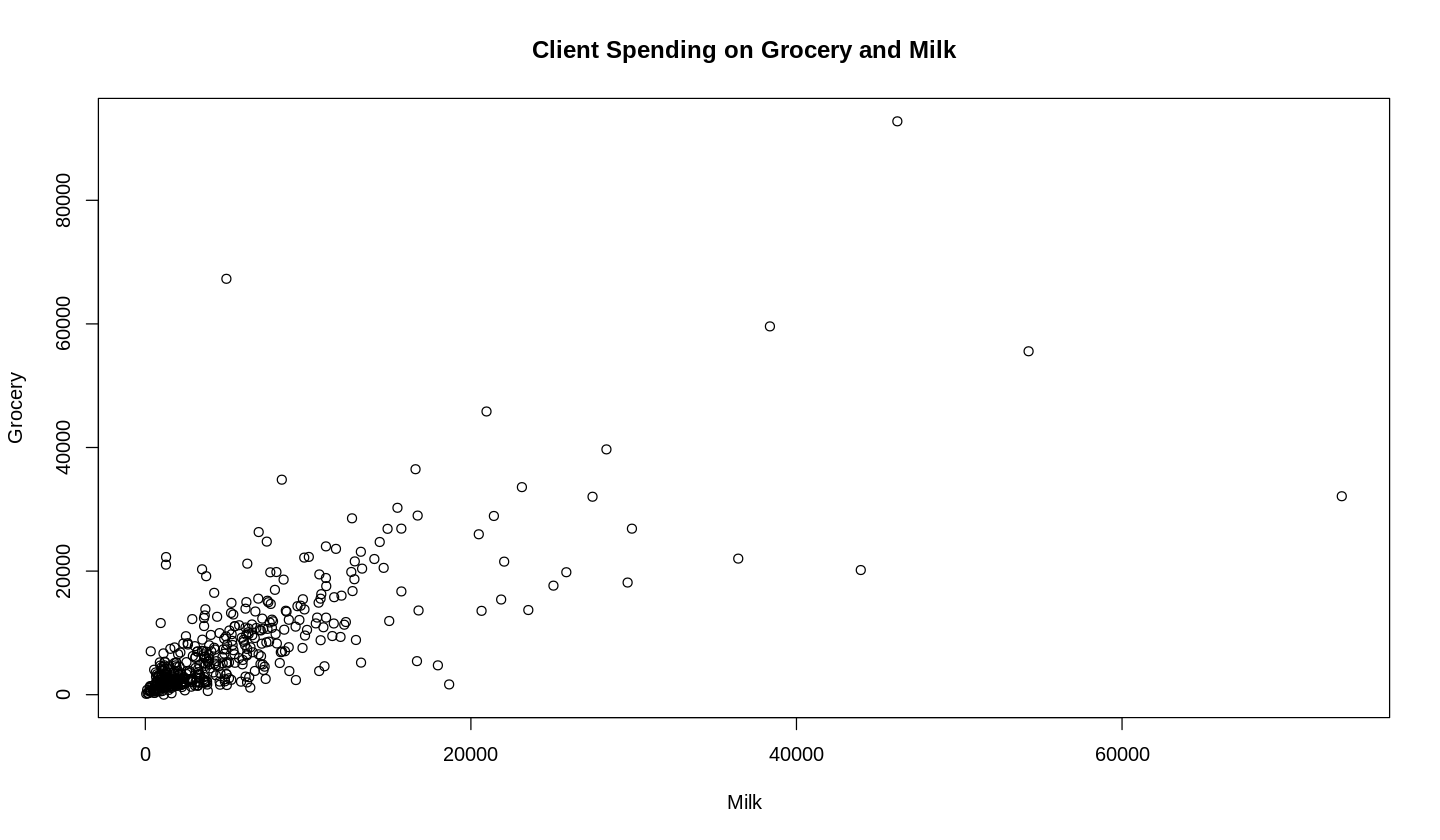

In [86]:
# We plotted Grocery and Milk spending. We found that the data tended to cluster in one area and we decided to not 
# include the outliers because a promotional campaign wouldn't be as concerned with appealing to the outliers as the
# the vast majority of clients. 
plot(wholesale_data$Milk, wholesale_data$Grocery, xlab = "Milk", ylab = "Grocery", main = "Client Spending on Grocery and Milk")

In [94]:
groc_milk <- cbind(wholesale_data$Grocery, wholesale_data$Milk)
groc_milk <- as.data.frame(groc_milk)
colnames(groc_milk) <- c("Grocery", "Milk")
head(groc_milk)

Grocery,Milk
7561,9656
9568,9810
7684,8808
4221,1196
7198,5410
5126,8259


In [90]:
km2 <- kmeans(groc_milk, 2, nstart=20)
km2

K-means clustering with 2 clusters of sizes 53, 387

Cluster means:
    Grocery      Milk
1 26933.849 19325.396
2  5351.597  3943.439

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2
 [38] 2 1 2 2 2 2 1 2 1 1 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2
 [75] 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
[112] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
[149] 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 1 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 2 2 1 2 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 2
[334] 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[371] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 

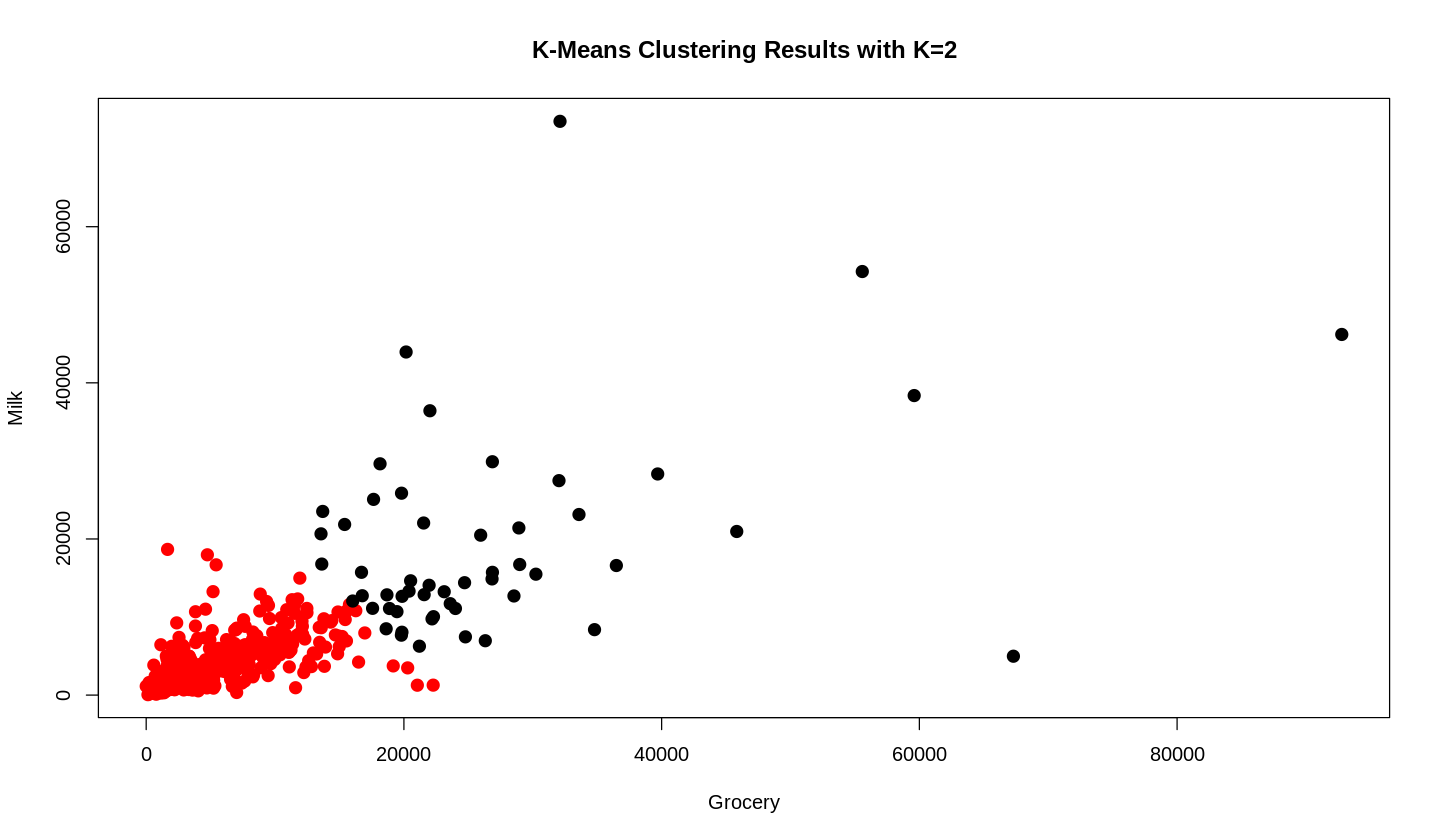

In [91]:
plot(groc_milk, col=(km2$cluster), main="K-Means Clustering Results with K=2", pch=20, cex=2)

In [92]:
km3 <- kmeans(groc_milk, 2, nstart=20)
km3

K-means clustering with 2 clusters of sizes 53, 387

Cluster means:
    Grocery      Milk
1 26933.849 19325.396
2  5351.597  3943.439

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2
 [38] 2 1 2 2 2 2 1 2 1 1 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2
 [75] 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
[112] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
[149] 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 1 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 2 2 1 2 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 2
[334] 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[371] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 

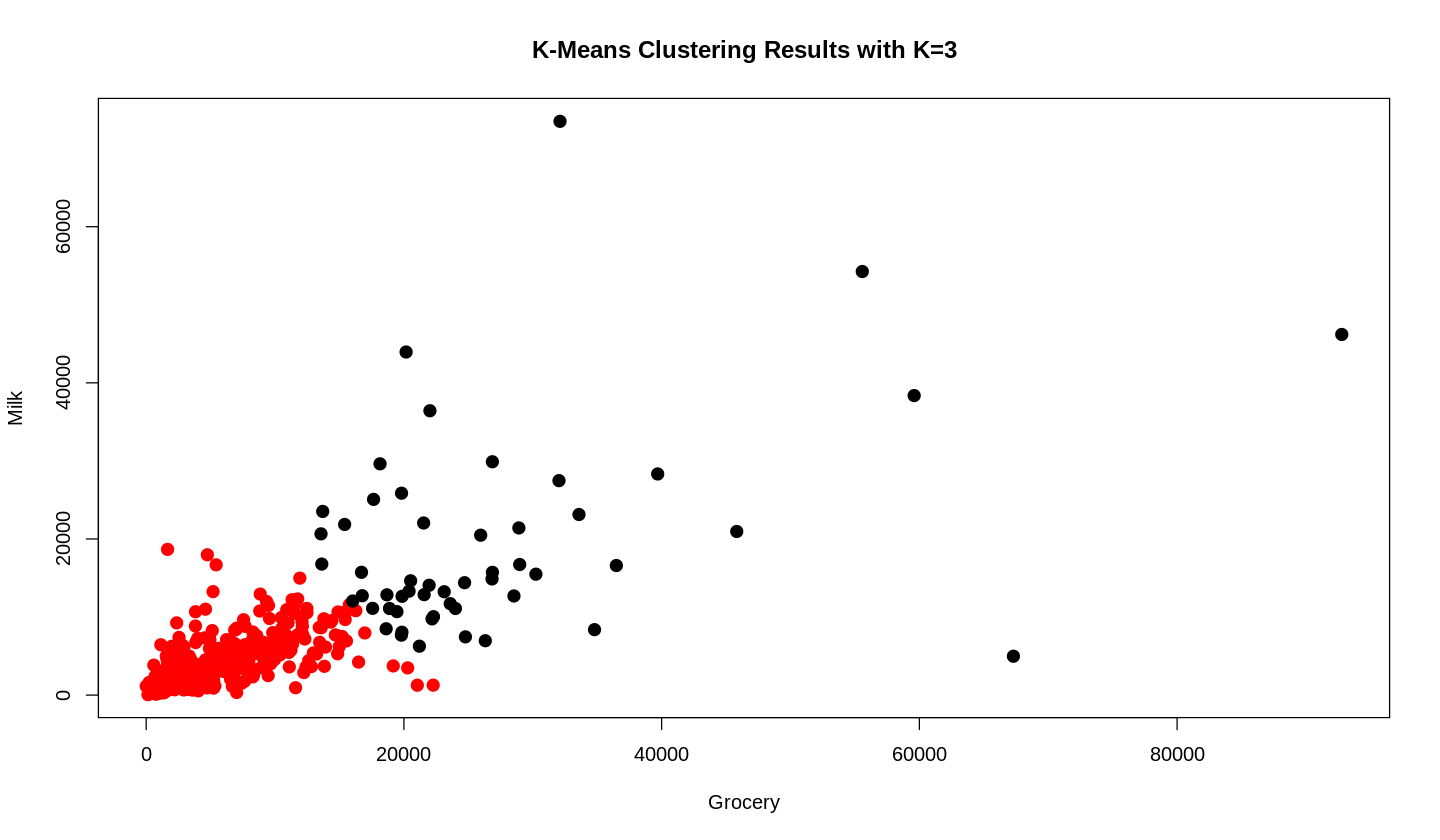

In [93]:
plot(groc_milk, col=(km3$cluster), main="K-Means Clustering Results with K=3", pch=20, cex=2)